# Regresja

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


Rozważmy zbiór Boston

In [2]:
boston = datasets.load_boston()
# print description
# print(boston.DESCR)

In [3]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [4]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [5]:
X=boston_X_train
y=boston_y_train

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy.


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)


In [30]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [1, 10, 100, 1000, 10000]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2026.1319522984, tolerance: 3.8280406043956052
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2048.1433449238116, tolerance: 3.4063733315068494
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1881.2249448250034, tolerance: 2.6657784493150682
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3

{'elasticnet__alpha': 100, 'polynomialfeatures__degree': 2}

In [31]:
grid_1.cv_results_['mean_test_score'].reshape(5, -1)

array([[ 4.70838951e-01,  1.12055989e-01, -8.87555304e+01,
        -8.78702543e+03],
       [ 2.14677917e-01,  1.92715153e-01, -9.81211483e-01,
        -1.08972348e+03],
       [-2.70538214e-01,  5.54021812e-01, -3.18282768e-01,
        -2.94126749e+01],
       [-4.50718211e-01,  3.08507834e-01, -9.35378118e-02,
        -3.26608426e+01],
       [-4.76690166e-01,  6.33903958e-02, -2.47281840e-02,
        -1.53203362e+02]])

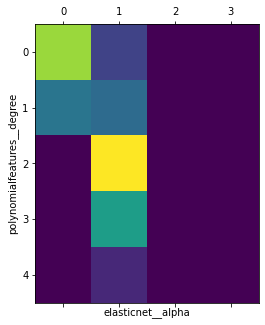

In [32]:
plt.matshow(grid_1.cv_results_['mean_test_score'].reshape(5, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [49]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5],
                    'lasso__alpha': [1, 10, 100, 1000, 10000]},
                    cv=kfold,
                    refit=True)
grid_2.fit(X, y)
grid_2.best_params_

/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2179.091752098396, tolerance: 3.8280406043956052
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2214.257086039656, tolerance: 3.4063733315068494
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1981.8585705343135, tolerance: 2.6657784493150682
  model = cd_fast.enet_coordinate_descent(
/Users/jakubpiasecki/opt/anaconda3/lib/python

{'lasso__alpha': 100, 'polynomialfeatures__degree': 2}

In [44]:
grid_2.cv_results_['mean_test_score'].reshape(5, -1)

array([[ 3.90250074e-01, -4.99653930e-01, -8.80046576e+01,
        -5.34584852e+05, -1.17758681e+07],
       [ 4.18909772e-01, -2.50016206e-01, -8.57322869e+01,
        -5.53833042e+03, -2.13559416e+07],
       [ 1.88516993e-01,  2.96984990e-01, -4.04638974e-01,
        -1.11030915e+03, -5.44010923e+04],
       [-3.12387365e-01,  5.35725527e-01, -7.59263584e-01,
        -4.54663964e+01, -4.40750069e+05],
       [-4.76690166e-01,  1.90872875e-01, -2.65256838e-02,
        -3.51471184e+01, -2.47129997e+04]])

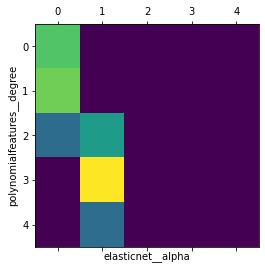

In [45]:
plt.matshow(grid_2.cv_results_['mean_test_score'].reshape(5, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [37]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5],
                    'ridge__alpha': [100, 1000, 10000, 100000, 1000000]},
                    cv=kfold,
                    refit=True)
grid_3.fit(X, y)
grid_3.best_params_

/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/jakubpiasecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in so

{'polynomialfeatures__degree': 1, 'ridge__alpha': 100}

In [38]:
grid_3.cv_results_['mean_test_score'].reshape(5, -1)

array([[ 4.82215336e-01,  4.28974501e-01,  1.98678448e-01,
        -8.60379809e-02, -1.94062941e-01],
       [-1.73209862e+01, -2.16885197e+00,  1.70763784e-01,
         1.52627756e-01,  3.03179995e-01],
       [-3.43889307e+05, -1.40522428e+05, -1.59499701e+04,
        -6.20380473e+02, -2.72926723e+01],
       [-8.09041011e+05, -8.09041011e+05, -5.90103578e+05,
        -5.17463625e+05, -6.79119958e+05],
       [-7.55839913e+04, -7.55839913e+04, -7.55839913e+04,
        -7.55839913e+04, -7.55839913e+04]])

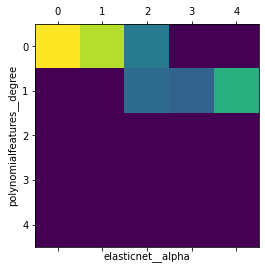

In [39]:
plt.matshow(grid_3.cv_results_['mean_test_score'].reshape(5, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [35]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X, y)
grid_4.best_params_

{'polynomialfeatures__degree': 1}

In [50]:
grid_4.cv_results_['mean_test_score'].reshape(8, -1)

array([[-2.00891958e-01],
       [-1.66807303e+02],
       [-5.26245807e+06],
       [-8.28277835e+06],
       [-3.87852255e+06],
       [-9.04181517e+06],
       [-1.67797589e+07],
       [-3.78936149e+07]])

In [54]:
grid_5 = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [100, 1000, 10000, 100000, 1000000],
                               "gamma": [0.0000001, 0.000001, 0.00001, 0.0001]})
grid_5.fit(X, y)
grid_5.best_params_

{'C': 10000, 'gamma': 1e-05}

In [62]:
grid_6 = GridSearchCV(RandomForestRegressor(random_state=3), cv=5,
                   param_grid={"max_depth": [1, 5, 10, 15, 20, 25],
                               'max_features': ['auto', 'sqrt', 'log2'],
                               "n_estimators": [5, 10, 15, 20, 25, 30]})
grid_6.fit(X, y)
grid_6.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 25}

In [63]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))
models.append(('RandomForest', grid_6.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.23897302560976152
Explained variance score: 0.2391056151076082
Median absolute error: 2.550245547375705
Mean squared error: 14.35517571522563
Mean absolute errors: 3.052903293795919
Lasso
R^2: 0.3413746565023681
Explained variance score: 0.34729775949862307
Median absolute error: 2.252019033645592
Mean squared error: 12.423583991861483
Mean absolute errors: 2.7415032521896996
Ridge
R^2: 0.2615522704536132
Explained variance score: 0.2631176513729735
Median absolute error: 2.1175063093831383
Mean squared error: 13.929265677660542
Mean absolute errors: 2.8252776487341373
LR
R^2: 0.41894349864428226
Explained variance score: 0.4219736471796022
Median absolute error: 2.089049047357003
Mean squared error: 10.960410679422768
Mean absolute errors: 2.5372525352164157
SVR
R^2: 0.36950003345661286
Explained variance score: 0.3826920623037121
Median absolute error: 1.736713800463531
Mean squared error: 11.89305781891126
Mean absolute errors: 2.5155675796800203
RandomForest
R^2: 

In [64]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge','LR','SVR','RandomForest'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,0.238973,0.239106,2.550246,14.355176,3.052903
1,Lasso,0.341375,0.347298,2.252019,12.423584,2.741503
2,Ridge,0.261552,0.263118,2.117506,13.929266,2.825278
3,LR,0.418943,0.421974,2.089049,10.960411,2.537253
4,SVR,0.369500,0.382692,1.736714,11.893058,2.515568
5,RandomForest,0.113504,0.147189,1.962000,16.721880,2.930880
